In [1]:
# col row 可以绘制子图 底层使用了facegrid
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

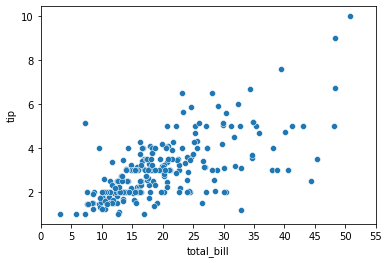

In [2]:
#普通的axes绘图
tips = sns.load_dataset("tips")
axes = sns.scatterplot(x = "total_bill", y = "tip", data = tips)
axes.set_xticks(range(0,60,5)) # matplotlib 的axes

<AxesSubplot:xlabel='day', ylabel='total_bill'>

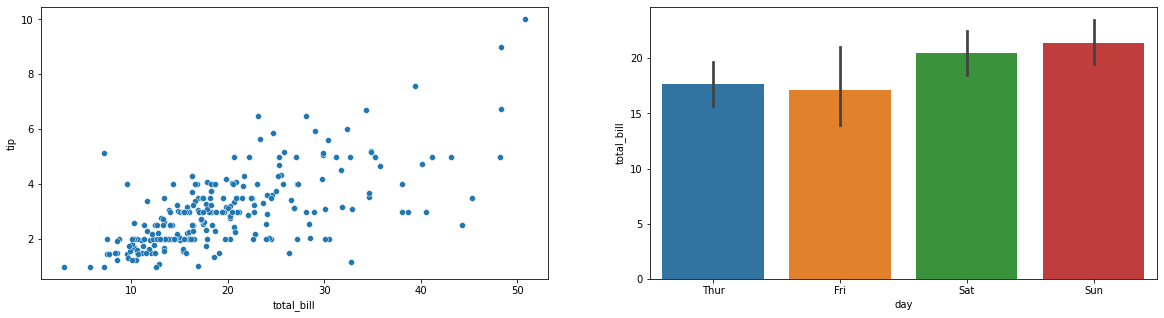

In [3]:
fig, [ax1,ax2] = plt.subplots(1,2,figsize=(20,5))
sns.scatterplot(x = "total_bill", y= "tip", data = tips, ax = ax1 )# 在ax1绘制
sns.barplot(x = "day", y= "total_bill", data = tips, ax = ax2 )# 在ax2绘制

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

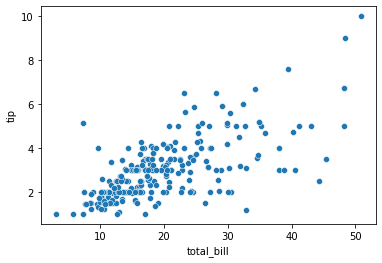

In [4]:
sns.scatterplot(x = tips['total_bill'], y= tips['tip'],data = tips)
# sns.relplot(x = tips['total_bill'], y= tips['tip'],data = tips) 可能会出现错误：xy需要是字符串

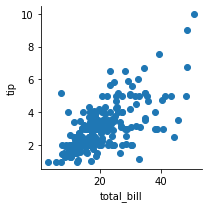

In [5]:
# FacetGrid
g1 = sns.FacetGrid(tips)
g1.map(plt.scatter, "total_bill","tip") # 函数名,x,y

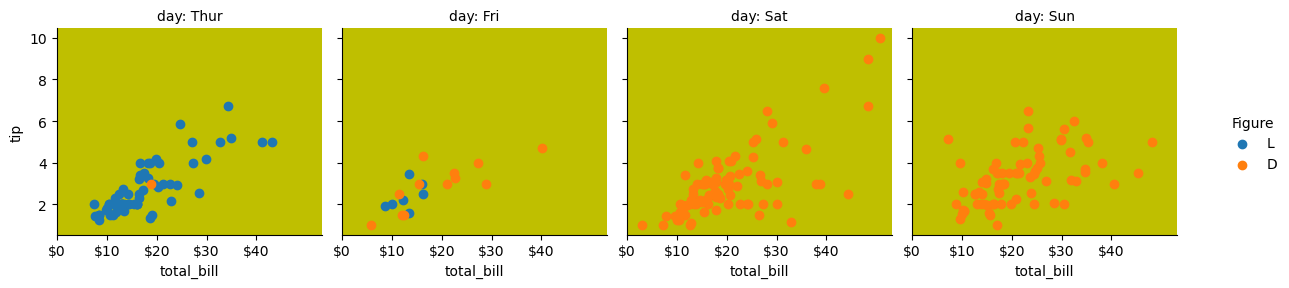

In [18]:
# FacetGrid绘制子图
g2 = sns.FacetGrid(tips,col = "day",hue = "time") # row = "time", col_wrap = 2
g2.map(plt.scatter,"total_bill","tip")
g2.add_legend(title = "Figure")
new_labels = ['L','D']

for text,label in zip(g2._legend.texts,new_labels): # zip - 打包 两个同时循环
    text.set_text(label)
#设置标题 g.set_titles()
g2.set_titles(template = "{col_var}: {col_name}") # {row_var} 绘制每行/列的名称 {row_name} 绘制每行列/图像的值 
# col_template row_template 

#g2.set_axis_labels() #一次性设置xy坐标的标题
g2.set(facecolor = "y", xticks = range(0,50,10),xticklabels = ["$%d" %x for x in range(0,50,10)])
g2.fig.set_dpi(100)# 分辨率

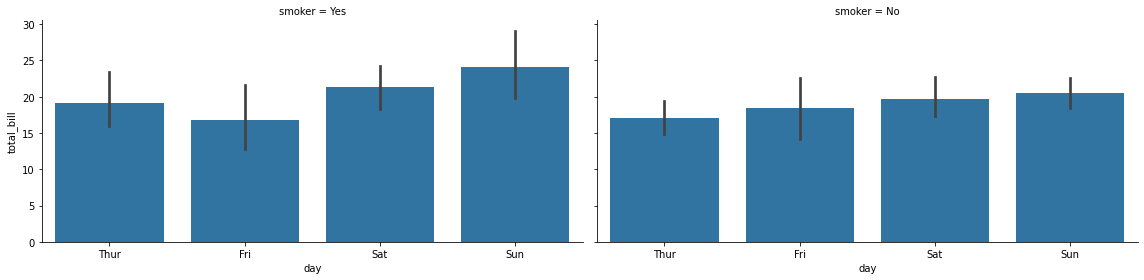

In [7]:
# FacetGrid设置图片尺寸和比例
#sns.set(rc = {"font.sans-serif":"SimHei"})设置中文字体
g3 = sns.FacetGrid(tips,col = "smoker",height = 4, aspect = 2 ) # aspect = w/h
g3.map(sns.barplot,"day","total_bill",order = ['Thur','Fri','Sat','Sun'])